### libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [4]:
users = pd.read_csv('../ml1m/content/dataset/users.dat', sep='::',
                        engine='python',
                        names=['userid', 'gender', 'age', 'occupation', 'zip']).set_index('userid')
ratings = pd.read_csv('../ml1m/content/dataset/ratings.dat', engine='python',
                          sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])
movies_train = pd.read_csv('../ml1m/content/dataset/movies_train.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid')
movies_train['genre'] = movies_train.genre.str.split('|')

users.age = users.age.astype('category')
users.gender = users.gender.astype('category')
users.occupation = users.occupation.astype('category')
ratings.movieid = ratings.movieid.astype('category')
ratings.userid = ratings.userid.astype('category')


## EDA

In [5]:
total_movies = movies_train.shape[0]
total_movies

3106

In [6]:
movies_train['name'] = movies_train['title'].apply(lambda x: x[:-7])
movies_train['year'] = movies_train['title'].apply(lambda x: x[-5:-1])
movies_train['genre_count'] = movies_train['genre'].apply(len)
movies_train

movies_train

,title,genre,name,year,genre_count
movieid,,,,,
1650,Washington Square (1997),[Drama],Washington Square,1997,1
185,"Net, The (1995)","[Sci-Fi, Thriller]","Net, The",1995,2
1377,Batman Returns (1992),"[Action, Adventure, Comedy, Crime]",Batman Returns,1992,4
3204,"Boys from Brazil, The (1978)",[Thriller],"Boys from Brazil, The",1978,1
1901,Dear Jesse (1997),[Documentary],Dear Jesse,1997,1
...,...,...,...,...,...
2539,Analyze This (1999),[Comedy],Analyze This,1999,1
3038,"Face in the Crowd, A (1957)",[Drama],"Face in the Crowd, A",1957,1
1832,Heaven's Burning (1997),"[Action, Drama]",Heaven's Burning,1997,2


In [7]:
movies_train['name_length'] = movies_train['name'].apply(lambda x: len(x.split(' ')))
movies_train['name_length'].describe()

count    3106.000000
mean        3.037991
std         1.834674
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: name_length, dtype: float64

In [8]:
# average name length by genre
movies_train['name_length'].groupby(movies_train['genre'].apply(lambda x: x[0])).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,413.0,2.857143,1.672574,1.0,2.00,2.0,4.00,10.0
Adventure,126.0,3.261905,1.767161,1.0,2.00,3.0,4.75,9.0
Animation,70.0,3.228571,1.762503,1.0,2.00,3.0,4.75,8.0
Children's,72.0,3.013889,1.467901,1.0,2.00,3.0,4.00,7.0
Comedy,811.0,3.000000,1.754711,1.0,2.00,3.0,4.00,15.0
Crime,111.0,2.576577,1.598576,1.0,1.00,2.0,3.00,8.0
Documentary,93.0,4.021505,2.440503,1.0,2.00,3.0,5.00,11.0
Drama,945.0,3.118519,1.945967,1.0,2.00,3.0,4.00,14.0
Fantasy,2.0,2.500000,2.121320,1.0,1.75,2.5,3.25,4.0


### count genres

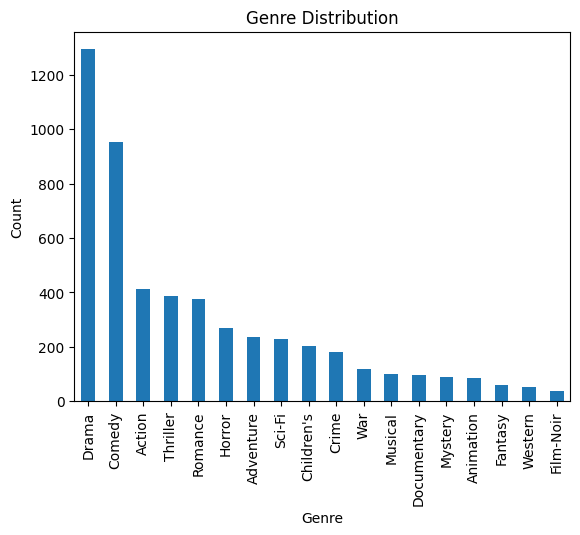

In [6]:
movie_counts = movies_train['genre'].explode().value_counts()
movie_counts.plot(kind='bar')

plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [7]:
movies_train['genre_count'] = movies_train['genre'].apply(len)
movies_train.describe()

,genre_count,name_length
count,3106.000000,3106.000000
mean,1.667096,3.037991
std,0.822740,1.834674
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,4.000000
max,6.000000,15.000000


In [8]:
genre_counts = movies_train['genre_count'].value_counts()
genre_counts

genre_count
1    1610
2    1036
3     357
4      91
5      11
6       1
Name: count, dtype: int64

<Figure size 750x750 with 0 Axes>

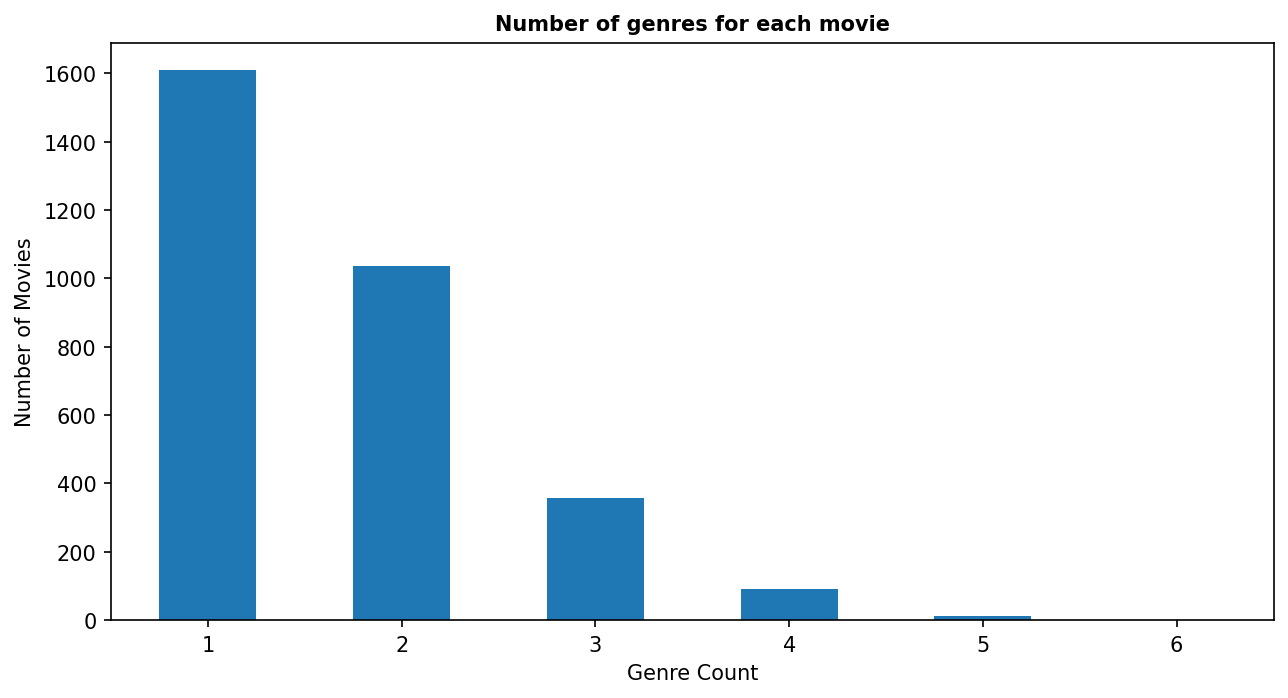

In [9]:
plt.figure(figsize=(5, 5), dpi=150)
plt.figure(figsize=(10, 5), dpi=150)
movies_train['genre_count'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Genre Count')
plt.ylabel('Number of Movies')
plt.title('Number of genres for each movie', 
          fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.show()

### genre by year

In [10]:
movies_train['year'].value_counts().sort_index()

year
1919      1
1920      1
1921      1
1922      1
1923      2
       ... 
1996    272
1997    254
1998    271
1999    222
2000    117
Name: count, Length: 81, dtype: int64

In [11]:
genre_by_year = movies_train.explode('genre')
genre_by_year['year'] = genre_by_year['year'].astype(int)
genre_by_year = genre_by_year.groupby(['year', 'genre']).size().reset_index(name='count')
genre_by_year

,year,genre,count
0,1919,Adventure,1
1,1919,Drama,1
2,1920,Comedy,1
3,1921,Action,1
4,1922,Drama,1
...,...,...,...
848,2000,Mystery,1
849,2000,Romance,12
850,2000,Sci-Fi,7
851,2000,Thriller,16


In [12]:
genre_by_year['year'].max()

2000

In [13]:
movies_train['genre'].explode().value_counts()

genre
Drama          1294
Comedy          953
Action          413
Thriller        386
Romance         377
Horror          268
Adventure       235
Sci-Fi          228
Children's      203
Crime           180
War             118
Musical         101
Documentary      97
Mystery          88
Animation        84
Fantasy          61
Western          54
Film-Noir        38
Name: count, dtype: int64

In [17]:
len(movies_train) * 0.05

155.3

In [126]:
genre_by_year['year_group'] = pd.cut(genre_by_year['year'], bins=range(1919, 
                                                                       2010, 10), right=False)
genre_by_year

,year,genre,count,year_group
0,1919,Adventure,1,"[1919, 1929)"
1,1919,Drama,1,"[1919, 1929)"
2,1920,Comedy,1,"[1919, 1929)"
3,1921,Action,1,"[1919, 1929)"
4,1922,Drama,1,"[1919, 1929)"
...,...,...,...,...
848,2000,Mystery,1,"[1999, 2009)"
849,2000,Romance,12,"[1999, 2009)"
850,2000,Sci-Fi,7,"[1999, 2009)"
851,2000,Thriller,16,"[1999, 2009)"


In [137]:
genre_by_year_grouped = genre_by_year.groupby(['year_group', 'genre'])
genre_by_year_grouped = genre_by_year_grouped['count'].sum().reset_index()
genre_by_year_grouped

,year_group,genre,count
0,"[1919, 1929)",Action,1
1,"[1919, 1929)",Adventure,2
2,"[1919, 1929)",Animation,0
3,"[1919, 1929)",Children's,0
4,"[1919, 1929)",Comedy,11
...,...,...,...
157,"[1999, 2009)",Romance,38
158,"[1999, 2009)",Sci-Fi,20
159,"[1999, 2009)",Thriller,46
160,"[1999, 2009)",War,4


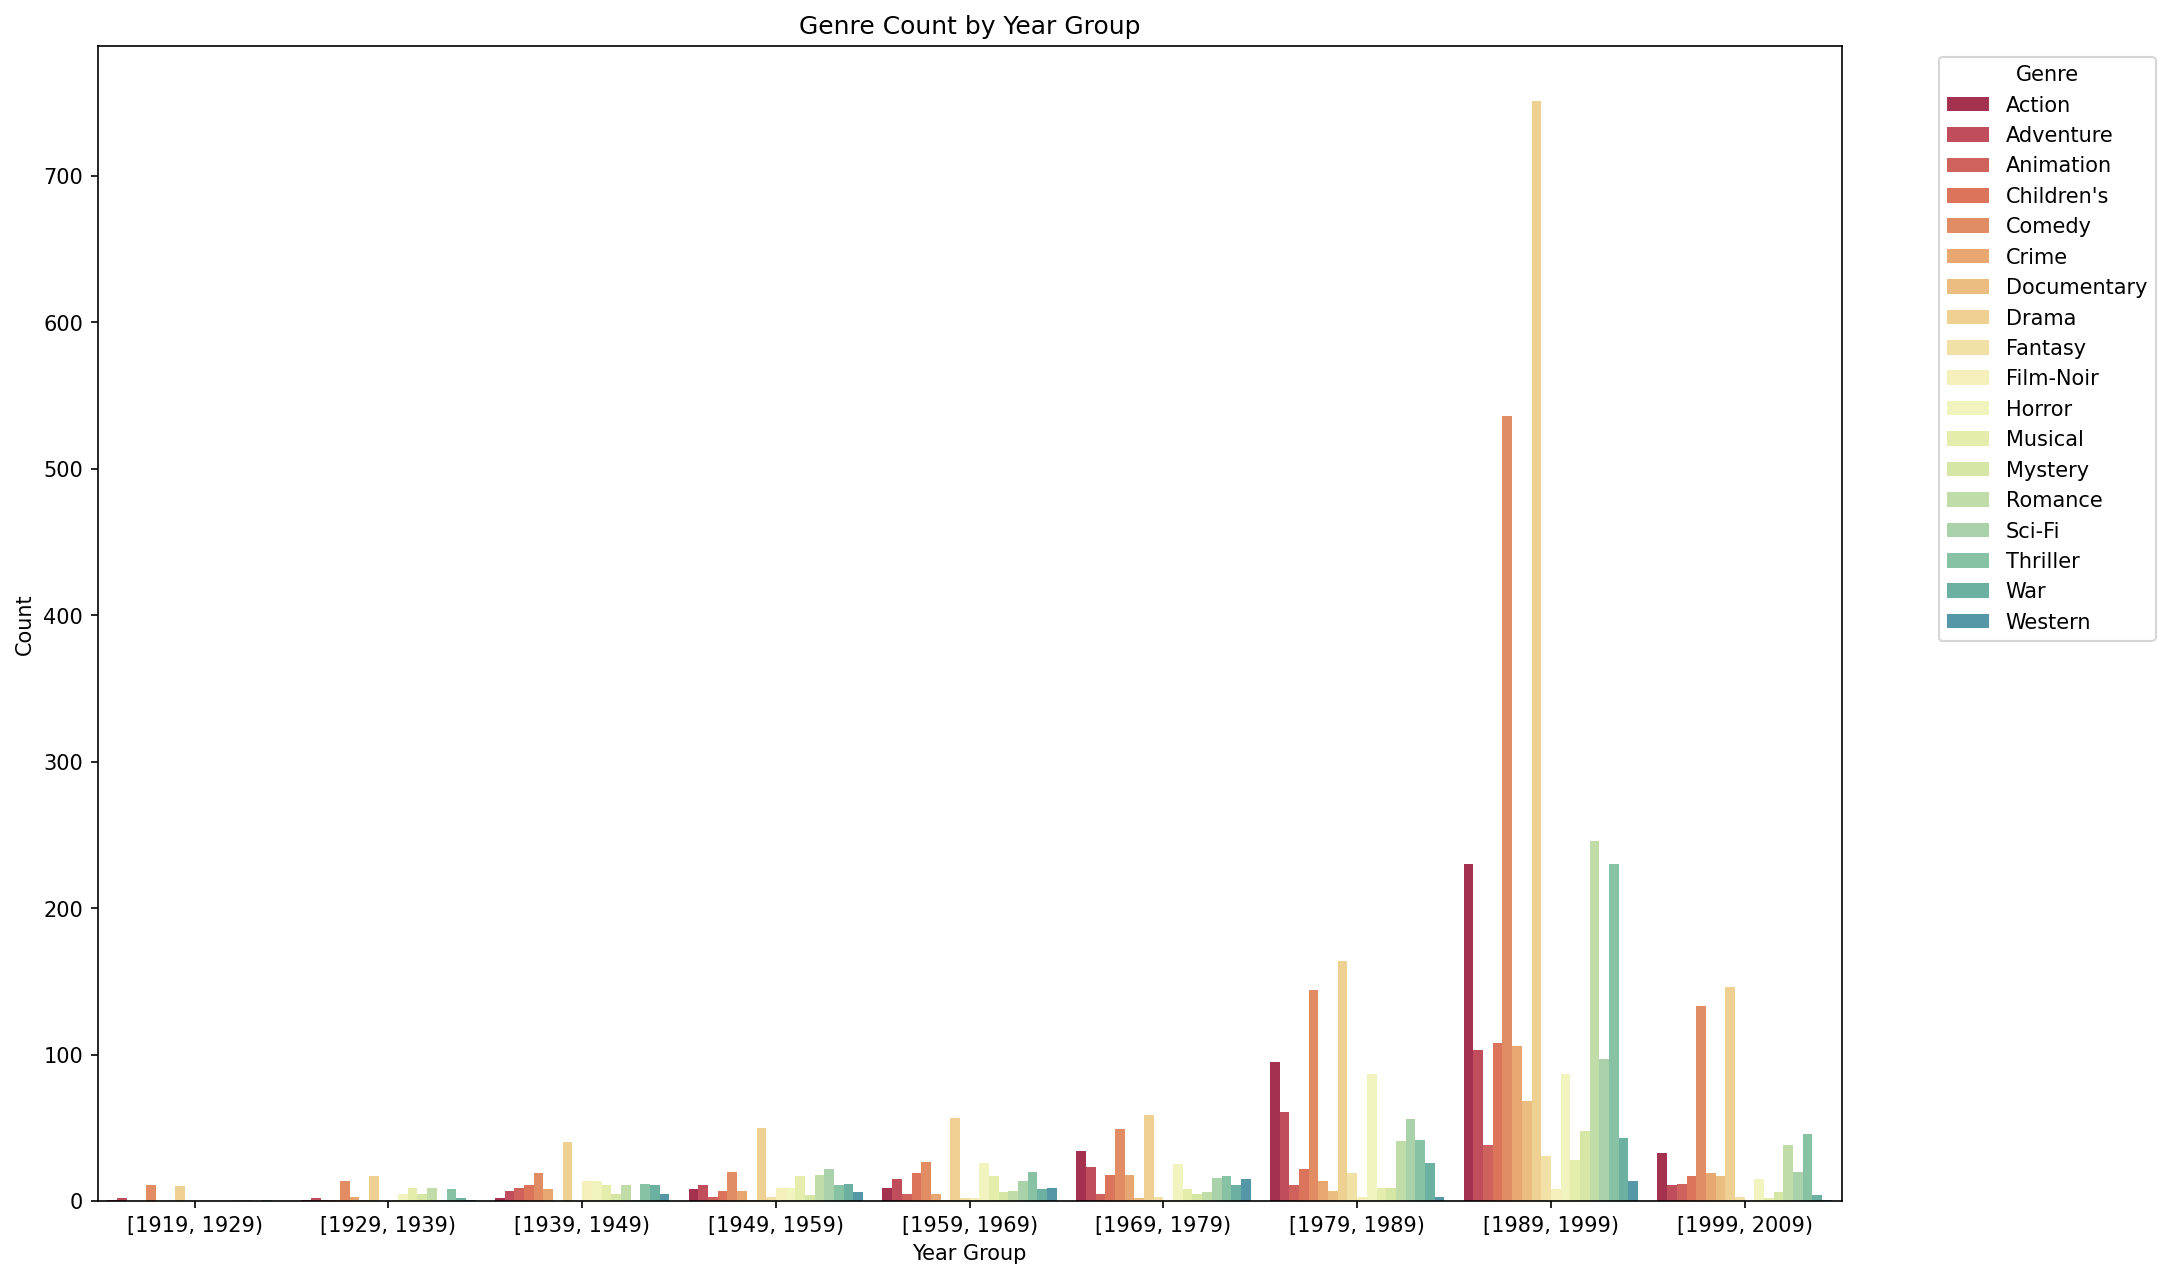

In [138]:
palette = sns.color_palette("Spectral", 20)

plt.figure(figsize=(15, 10), dpi=150)
sns.barplot(x='year_group', y='count', hue='genre', data=genre_by_year_grouped, 
            palette=palette, width=0.9, errorbar=None,
            hue_order=sorted(genre_by_year['genre'].unique()))
plt.xlabel('Year Group')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Genre Count by Year Group')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


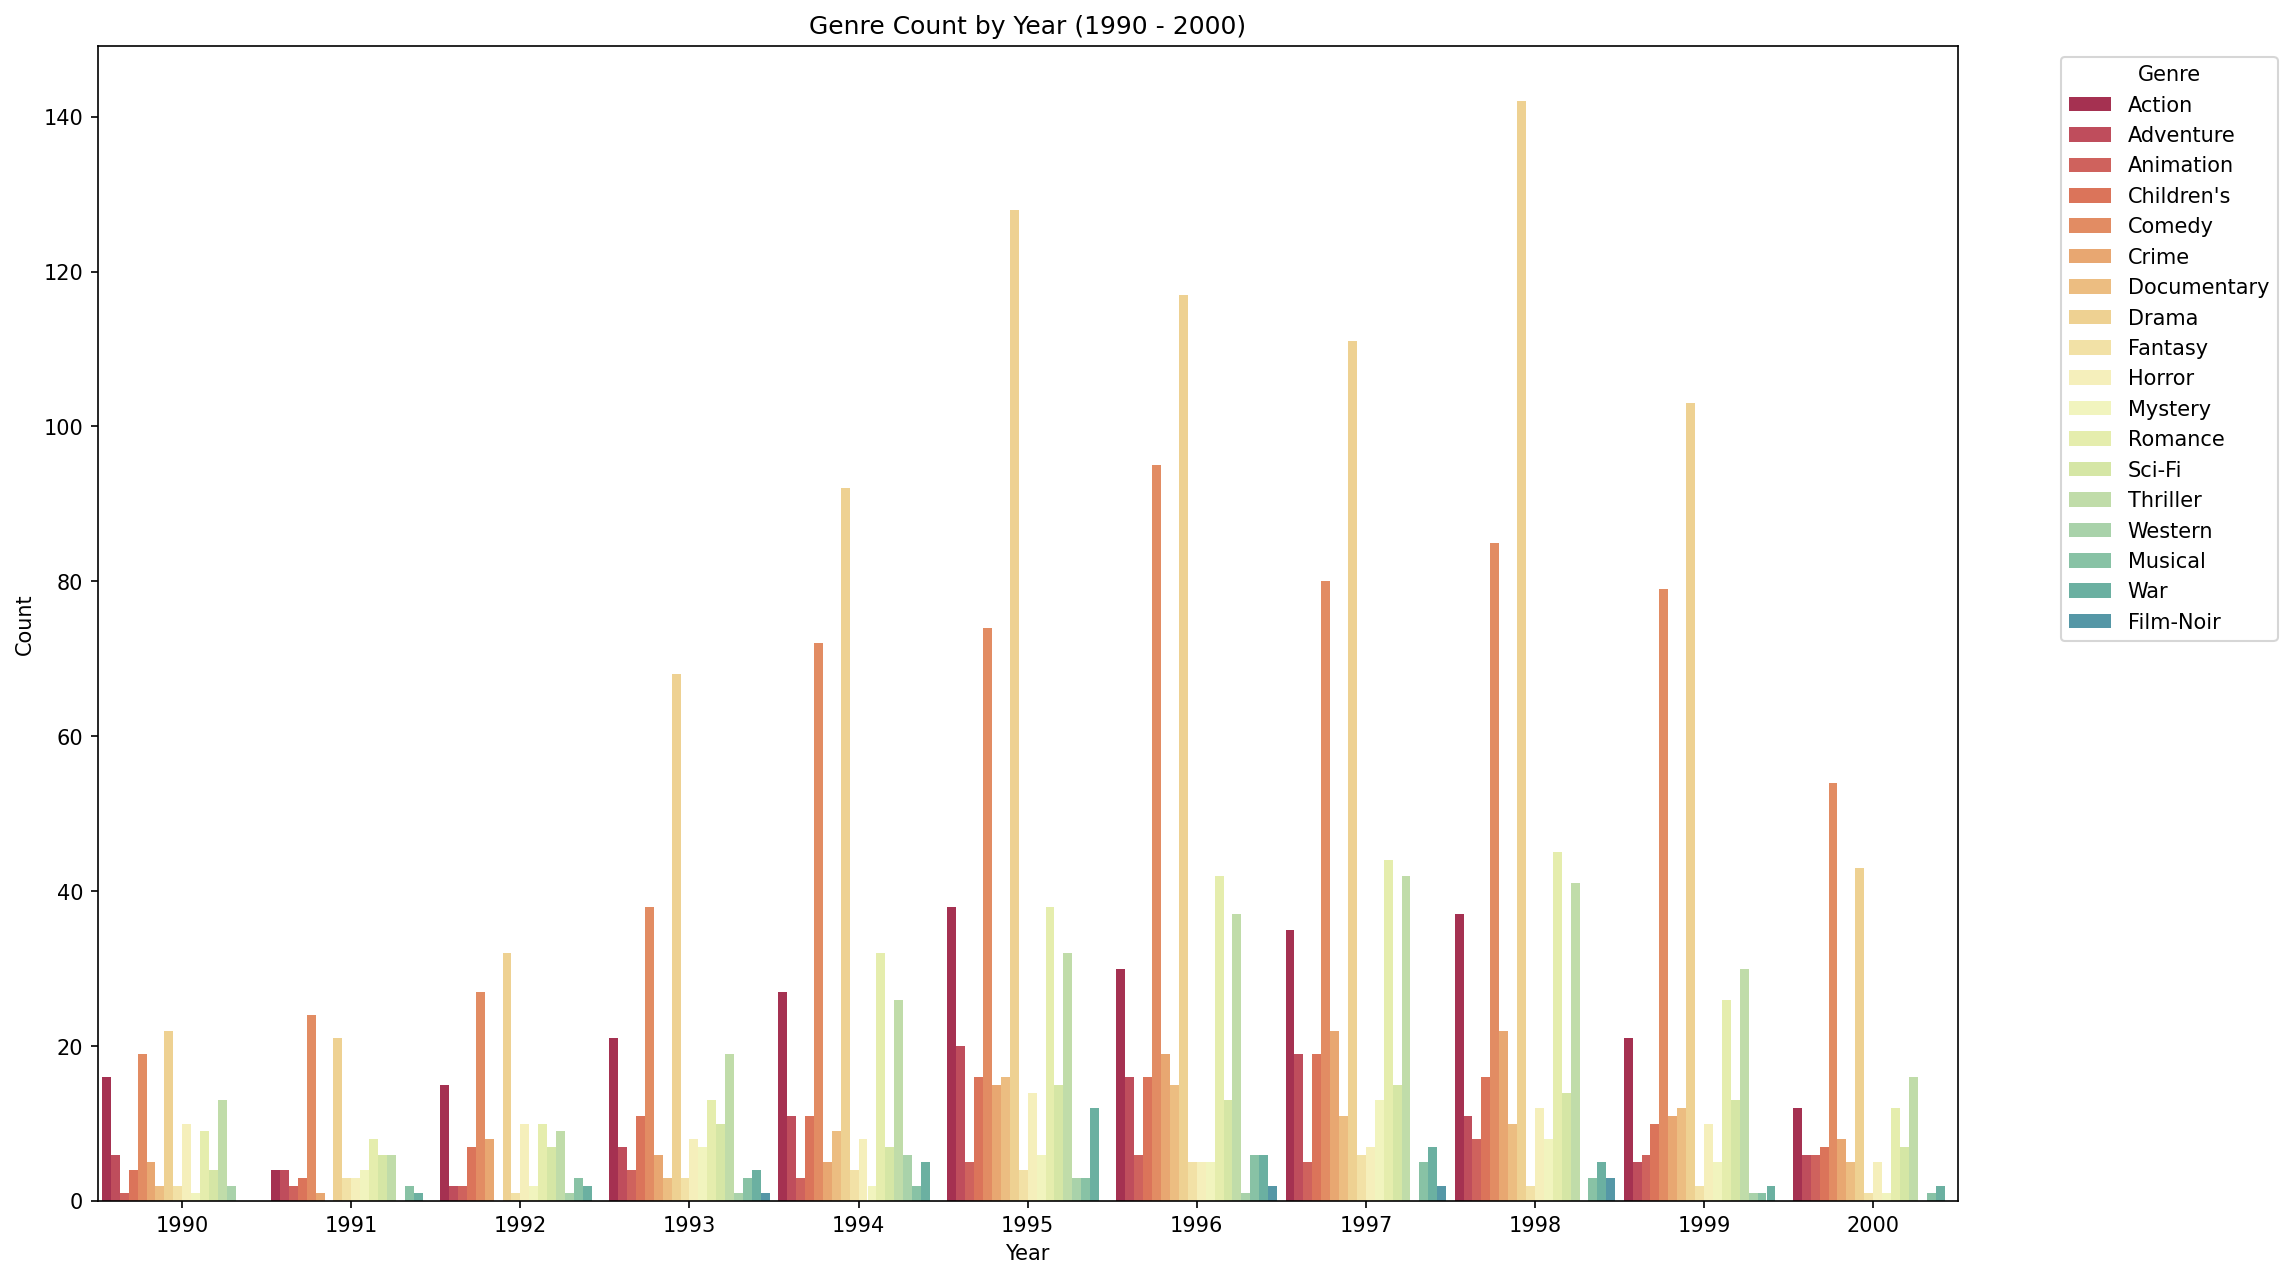

In [142]:
# plot 1990 - 2000
plt.figure(figsize=(16, 10), dpi=150)

sns.barplot(x='year', y='count', hue='genre', data=genre_by_year[genre_by_year['year'] >= 1990],
            palette=palette, width=0.95, errorbar=None)
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Genre Count by Year (1990 - 2000)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Genre Co-occurrence

In [29]:
movies_train.head()

,title,genre,name,year,genre_count
movieid,,,,,
1650,Washington Square (1997),[Drama],Washington Square,1997,1
185,"Net, The (1995)","[Sci-Fi, Thriller]","Net, The",1995,2
1377,Batman Returns (1992),"[Action, Adventure, Comedy, Crime]",Batman Returns,1992,4
3204,"Boys from Brazil, The (1978)",[Thriller],"Boys from Brazil, The",1978,1
1901,Dear Jesse (1997),[Documentary],Dear Jesse,1997,1


In [59]:
cooccurrence_matrix = pd.DataFrame(0, index=movie_counts.index, 
                                   columns=movie_counts.index)

for genres in movies_train['genre']:
    for genre1 in genres:
        for genre2 in genres:
            cooccurrence_matrix.loc[genre1, genre2] += 1

cooccurrence_matrix

genre,Drama,Comedy,Action,Thriller,Romance,Horror,Adventure,Sci-Fi,Children's,Crime,War,Musical,Documentary,Mystery,Animation,Fantasy,Western,Film-Noir
genre,,,,,,,,,,,,,,,,,,
Drama,1294,182,79,83,169,10,29,19,24,78,61,15,3,30,0,7,11,5
Comedy,182,953,55,27,162,31,39,26,76,30,16,36,4,10,20,17,13,1
Action,79,55,413,109,31,18,109,88,12,47,41,3,0,11,3,14,9,0
Thriller,83,27,109,386,30,47,27,59,1,48,7,0,0,37,4,1,1,16
Romance,169,162,31,30,377,2,21,7,4,9,14,13,0,11,1,6,3,0
Horror,10,31,18,47,2,268,6,50,1,3,0,2,0,5,1,0,0,1
Adventure,29,39,109,27,21,6,235,59,67,7,12,8,0,2,13,32,3,1
Sci-Fi,19,26,88,59,7,50,59,228,13,4,11,2,0,5,8,13,2,2
Children's,24,76,12,1,4,1,67,13,203,0,2,32,0,2,66,34,1,0


In [48]:
182 / 1294

0.14064914992272023

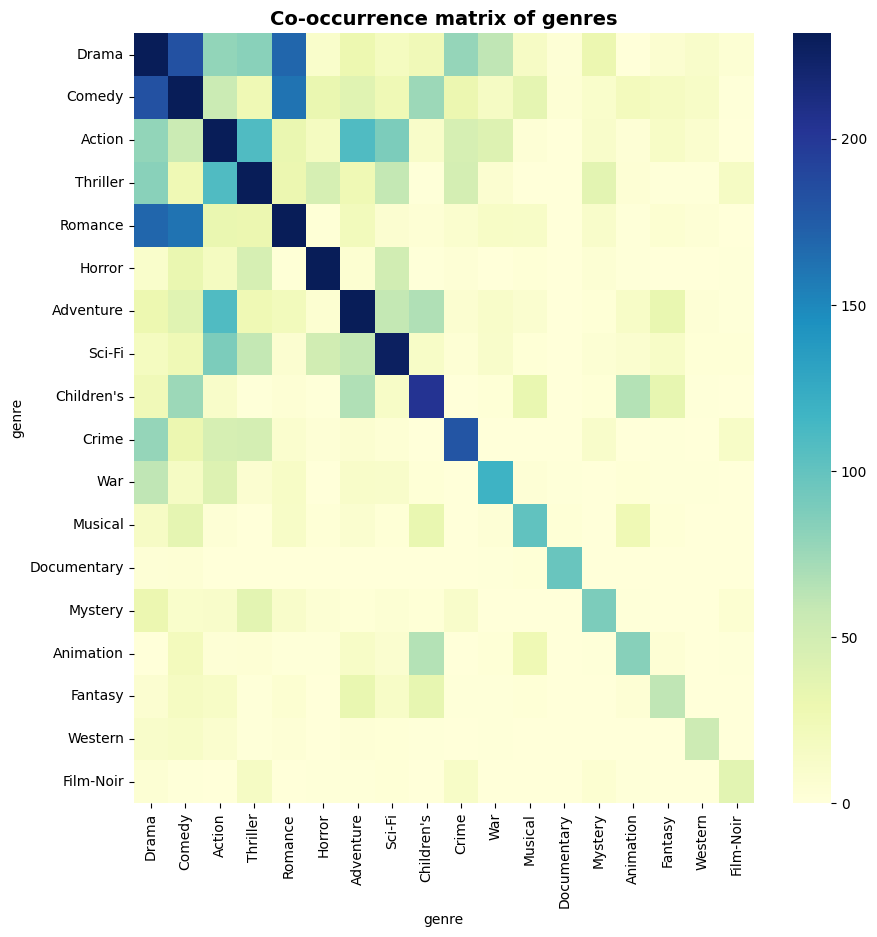

In [61]:
# heatmap

import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(cooccurrence_matrix, cmap='YlGnBu', robust=True)
plt.title('Co-occurrence matrix of genres', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [46]:
movie_counts

genre
Drama          1294
Comedy          953
Action          413
Thriller        386
Romance         377
Horror          268
Adventure       235
Sci-Fi          228
Children's      203
Crime           180
War             118
Musical         101
Documentary      97
Mystery          88
Animation        84
Fantasy          61
Western          54
Film-Noir        38
Name: count, dtype: int64

In [1]:
movies_train

NameError: name 'movies_train' is not defined